In [1]:
import numpy as np
import scipy.io
from sklearn.preprocessing import OneHotEncoder

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
def feed_forward(girdi,all_thetas):
    a = girdi
    katman_ciktilari = list()
    for thetas in all_thetas:
        temp = np.concatenate([np.ones((a.shape[0],1)),a],axis=1)
        a = sigmoid(temp.dot(thetas.T)) 
        katman_ciktilari.append(a)
    return a,katman_ciktilari[:-1]

In [4]:
def accuracy(Y,tahminler):
    return (Y == tahminler.argmax(axis=1).reshape(-1,1)).sum() / Y.shape[0]

In [5]:
def mse_hesapla(tahminler,gercek):
    return (((tahminler-gercek)**2)/gercek.shape[0]).sum()

In [6]:
def gradient_checking(girdi,cikti,gradientle_hesaplananlar,all_thetas,epsilon=0.0001):
    tum_agirliklar = np.concatenate([x.flatten() for x in all_thetas])
    egimle_gradientler = np.zeros((tum_agirliklar.shape[0]))
    for i,agirlik in enumerate(tum_agirliklar):
        temp1 = tum_agirliklar.copy()
        temp1[i] += epsilon
        t1 = temp1[:25*401].reshape(25,401)
        t2 = temp1[25*401:].reshape(10,26)
        tahmin1,_ = feed_forward(girdi,[t1,t2])
        
        temp2 = tum_agirliklar.copy()
        temp2[i] -= epsilon
        t1 = temp2[:25*401].reshape(25,401)
        t2 = temp2[25*401:].reshape(10,26)
        tahmin2,_ = feed_forward(girdi,[t1,t2])
        
        x1 = mse_hesapla(tahmin1,cikti)
        x2 = mse_hesapla(tahmin2,cikti)
        
        egimle_gradientler[i] = (x1-x2)/(2*epsilon)
    gradient_duz = np.concatenate([x.flatten() for x in gradients])
    return np.abs((gradient_duz - egimle_gradientler)).sum() / gradient_duz.size

In [7]:
data = scipy.io.loadmat('ex4data1.mat')
resimler = data['X']
etiketler = data['y']

In [8]:
etiketler[etiketler == 10] = 0

In [9]:
thetas1 = np.random.randn(25,resimler.shape[1]+1)
thetas2 = np.random.randn(len(np.unique(etiketler)),thetas1.shape[0]+1)
#ep = 0.12
#thetas1 = np.random.rand(25,resimler.shape[1]+1)*2*ep - ep
#thetas2 = np.random.rand(len(np.unique(etiketler)),thetas1.shape[0]+1)*2*ep - ep

In [10]:
all_thetas = np.array([thetas1,thetas2])

In [11]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
etiketler_ohe = ohe.fit_transform(etiketler).toarray()
lr = 0.01

In [12]:
all_losses = list()

In [13]:
thetas1.shape

(25, 401)

In [14]:
thetas2.shape

(10, 26)

In [15]:
for epoch in range(100):
    losses = list()
    for i in range(resimler.shape[0]):
        son_cikti,ara_katman_ciktilari = feed_forward(resimler[i:i+1],[thetas1,thetas2])
        if(i % 10 == 0 or i == resimler.shape[0]-1):
            losses.append(mse_hesapla(son_cikti,etiketler_ohe[i:i+1]))
        deltas = [(son_cikti-etiketler_ohe[i:i+1]).reshape(10,1)]
        delta = deltas[0]
        for thetas,a in zip(all_thetas[1:][::-1],ara_katman_ciktilari):
            a_temp = np.concatenate([np.ones((a.shape[0],1)),a],axis=1)
            delta = (thetas.T.dot(delta).T*a_temp*(1-a_temp)).reshape(-1,1)
            deltas.append(delta)
        gradients = list()
        temp = [resimler[i].copy().reshape(1,-1)]
        temp.extend(ara_katman_ciktilari)
        for j,(delta,cikti) in enumerate(zip(deltas,temp[::-1])):
            t = np.concatenate([np.ones((cikti.shape[0],1)),cikti],axis=1)
            if j == len(deltas)-1:
                gradients.append(delta.dot(t)[1:])
            else:
                gradients.append(delta.dot(t))
            all_thetas[all_thetas.size-j-1] -= lr*gradients[j]
        if(i%1000 == 0):
            benim = np.concatenate([x.flatten() for x in gradients])
            gradient_checking(resimler[i:i+1],etiketler_ohe[i:i+1],gradients,all_thetas)
    tahmin,_ = feed_forward(resimler,all_thetas)
    mse = mse_hesapla(tahmin,etiketler_ohe)
    print("{0}.Epok, Loss = {1}, Accuracy = {2}".format(epoch+1,mse,accuracy(etiketler,tahmin)))
    #all_losses.extend(losses)
    all_losses.append(mse)

1.Epok, Loss = 1.724731203898453, Accuracy = 0.1
2.Epok, Loss = 1.6748004709627724, Accuracy = 0.1
3.Epok, Loss = 1.6042947115164026, Accuracy = 0.1
4.Epok, Loss = 1.5159108088221507, Accuracy = 0.1002
5.Epok, Loss = 1.4207518652005324, Accuracy = 0.1028
6.Epok, Loss = 1.3313771733147683, Accuracy = 0.1108
7.Epok, Loss = 1.2507722607685878, Accuracy = 0.132
8.Epok, Loss = 1.1796845235292064, Accuracy = 0.164
9.Epok, Loss = 1.118046528158544, Accuracy = 0.217
10.Epok, Loss = 1.0656811939814435, Accuracy = 0.2672
11.Epok, Loss = 1.0220290352368118, Accuracy = 0.3046
12.Epok, Loss = 0.9858223281353807, Accuracy = 0.3318
13.Epok, Loss = 0.956276074597346, Accuracy = 0.3574
14.Epok, Loss = 0.9306895936488941, Accuracy = 0.3828
15.Epok, Loss = 0.9067784405701769, Accuracy = 0.4046
16.Epok, Loss = 0.8844102074338324, Accuracy = 0.423
17.Epok, Loss = 0.8636300905868854, Accuracy = 0.4402
18.Epok, Loss = 0.8443237548794076, Accuracy = 0.4536
19.Epok, Loss = 0.8263857914573353, Accuracy = 0.4674

In [16]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss')

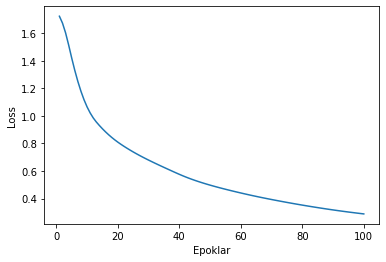

In [17]:
plt.plot(range(1,len(all_losses)+1),all_losses)
plt.xlabel("Epoklar")
plt.ylabel("Loss")

Sinif =  [1]


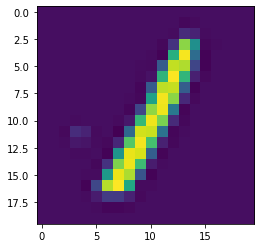

In [18]:
indis = 800
print("Sinif = ",etiketler[indis])
plt.imshow(resimler[indis].reshape(20,20,order='F'))

In [19]:
cikti,_ = feed_forward(resimler[indis:indis+1],all_thetas)

In [20]:
cikti.argmax()

1

In [21]:
cikti

array([[2.78118140e-09, 9.92564065e-01, 1.71081686e-03, 2.14376376e-03,
        8.54901170e-05, 6.57362118e-08, 1.66537050e-05, 1.76860168e-02,
        4.31920608e-04, 5.59537579e-03]])

In [22]:
tahmin.argmax(axis=1)

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)